# Classification and clustering of uci-HAR data

This dataset comes from the <a href=https://archive.ics.uci.edu/ml/>UCI Machine-Learning repository</a>. Please first read the <a href=https://archive.ics.uci.edu/ml/datasets/Smartphone+Dataset+for+Human+Activity+Recognition+%28HAR%29+in+Ambient+Assisted+Living+%28AAL%29>dataset description</a> to understand what is the data.


<b>The goal on this dataset is first to perform clustering on UNLABELLED data, and to learn a classifier on LABELLED. Finally, analysis should be conducted to check whether or not the clustering could be used for classification (i.e. does the clusters properly map on classes, possibly with more than 1 cluster per class?).</b>

### Data Set

#### Information
We collected more dataset to improve the accuracy of our HAR algorithms applied in
a Social connectedness experiment in the domain of Ambient Assisted Living.
The dataset was collected from the in-built accelerometer and gyroscope of a
smartphone worn around the waist of participants. See waist_mounted_phone.PNG.
The data was collected from 30 participants within the age group of 22-79 years.
Each activity (standing, sitting, laying, walking, walking upstairs, walking downstairs) was
performed for 60secs and the 3-axial linear acceleration and 3-axial angular velocity were
collected at a constant rate of 50Hz.

#### Data of extracted features:  
For each record in the dataset it is provided:
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. The labels are from 1 to 6, corresponding to: 1 WALKING; 2 WALKING_UPSTAIRS; 3 WALKING_DOWNSTAIRS; 4 SITTING; 5 STANDING; 6 LAYING

##### File details:
- 'train/**X_train.txt**': Training set: 7352 samples * 561 features
- 'train/**y_train.txt**': Training labels: 7352 samples * 1 label
- 'test/**X_test.txt**': Test set: 2947 samples * 561 features
- 'test/**y_test.txt**': Test labels: 2947 samples * 1 label
- 'features.txt': List of all features.
- 'features_info.txt': Shows information about the variables used on the feature vector.
- 'activity_labels.txt': Links the class labels with their activity name.


#### Data of time sequences:  
The dataset also includes the **time sequences** of Accelerometer & Gyroscope signals of each record before extracting the features.
They are available for the train and test data. Their descriptions are equivalent. 
- 'train/Inertial Signals/**total_acc_x_train.txt**': The acceleration signal from the smartphone accelerometer X axis in standard gravity units 'g'. Every row shows a 128 element vector. The same description applies for the 'total_acc_y_train.txt' and 'total_acc_z_train.txt' files for the Y and Z axis. 
- 'train/Inertial Signals/**body_acc_x_train.txt**': The body acceleration signal obtained by subtracting the gravity from the total acceleration. 
- 'train/Inertial Signals/**body_gyro_x_train.txt**': The angular velocity vector measured by the gyroscope for each window sample. The units are radians/second. 

### Algorithms to use:
For this mini project, we will use following machine learning algorithms to analyze the data of extracted features:
   1. Dimensionality Reduction (Unsupervised Learning):
        - **TSNE**
   2. Clustering (Unsupervised Learning):
        - **K-Means**
        - **AHC**
        - **GMM**
   3. Classification (Supervised Learning):
        - **Random Forest**
        - **MLP**

We will also use following machine learning classification algorithms to analyze the time sequences of Accelerometer & Gyroscope signals:
   4. **HMM** (Supervised Learning) -- Please check "**uci_HAR_sequence_HMM.ipynb**"
   5. **LSTM** (Supervised Learning) -- Please check "**uci_HAR_sequence_LSTM.ipynb**"

### Step 0: import the necessary packets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import sklearn
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

### Step 0: Data loading and formatting

We use pandas to read the data.

Firstly, read X_train:

In [3]:
google_drive = 'drive/My Drive/UCI_HAR/'
features = pd.read_csv(google_drive+'features.txt', sep='\n', header=None).values.reshape(-1)
X_train = pd.read_csv(google_drive+'train/X_train.txt', sep='\s+', names=features, index_col=False)
print(X_train.shape)
X_train.head()

(7352, 561)


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,11 tBodyAcc-max()-Y,12 tBodyAcc-max()-Z,13 tBodyAcc-min()-X,14 tBodyAcc-min()-Y,15 tBodyAcc-min()-Z,16 tBodyAcc-sma(),17 tBodyAcc-energy()-X,18 tBodyAcc-energy()-Y,19 tBodyAcc-energy()-Z,20 tBodyAcc-iqr()-X,21 tBodyAcc-iqr()-Y,22 tBodyAcc-iqr()-Z,23 tBodyAcc-entropy()-X,24 tBodyAcc-entropy()-Y,25 tBodyAcc-entropy()-Z,"26 tBodyAcc-arCoeff()-X,1","27 tBodyAcc-arCoeff()-X,2","28 tBodyAcc-arCoeff()-X,3","29 tBodyAcc-arCoeff()-X,4","30 tBodyAcc-arCoeff()-Y,1","31 tBodyAcc-arCoeff()-Y,2","32 tBodyAcc-arCoeff()-Y,3","33 tBodyAcc-arCoeff()-Y,4","34 tBodyAcc-arCoeff()-Z,1","35 tBodyAcc-arCoeff()-Z,2","36 tBodyAcc-arCoeff()-Z,3","37 tBodyAcc-arCoeff()-Z,4","38 tBodyAcc-correlation()-X,Y","39 tBodyAcc-correlation()-X,Z","40 tBodyAcc-correlation()-Y,Z",...,522 fBodyBodyAccJerkMag-energy(),523 fBodyBodyAccJerkMag-iqr(),524 fBodyBodyAccJerkMag-entropy(),525 fBodyBodyAccJerkMag-maxInds,526 fBodyBodyAccJerkMag-meanFreq(),527 fBodyBodyAccJerkMag-skewness(),528 fBodyBodyAccJerkMag-kurtosis(),529 fBodyBodyGyroMag-mean(),530 fBodyBodyGyroMag-std(),531 fBodyBodyGyroMag-mad(),532 fBodyBodyGyroMag-max(),533 fBodyBodyGyroMag-min(),534 fBodyBodyGyroMag-sma(),535 fBodyBodyGyroMag-energy(),536 fBodyBodyGyroMag-iqr(),537 fBodyBodyGyroMag-entropy(),538 fBodyBodyGyroMag-maxInds,539 fBodyBodyGyroMag-meanFreq(),540 fBodyBodyGyroMag-skewness(),541 fBodyBodyGyroMag-kurtosis(),542 fBodyBodyGyroJerkMag-mean(),543 fBodyBodyGyroJerkMag-std(),544 fBodyBodyGyroJerkMag-mad(),545 fBodyBodyGyroJerkMag-max(),546 fBodyBodyGyroJerkMag-min(),547 fBodyBodyGyroJerkMag-sma(),548 fBodyBodyGyroJerkMag-energy(),549 fBodyBodyGyroJerkMag-iqr(),550 fBodyBodyGyroJerkMag-entropy(),551 fBodyBodyGyroJerkMag-maxInds,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.999867,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964

Then read y_train:

In [4]:
y_train = pd.read_csv(google_drive+'train/y_train.txt', sep='\n', header=None, names=['Activity No.'])
print(y_train.shape)
y_train.head()

(7352, 1)


,Activity No.
0,5
1,5
2,5
3,5
4,5


Read X_test:

In [5]:
X_test = pd.read_csv(google_drive+'test/X_test.txt', sep='\s+', names=features, index_col=False)
print(X_test.shape)
X_test.head()

(2947, 561)


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,11 tBodyAcc-max()-Y,12 tBodyAcc-max()-Z,13 tBodyAcc-min()-X,14 tBodyAcc-min()-Y,15 tBodyAcc-min()-Z,16 tBodyAcc-sma(),17 tBodyAcc-energy()-X,18 tBodyAcc-energy()-Y,19 tBodyAcc-energy()-Z,20 tBodyAcc-iqr()-X,21 tBodyAcc-iqr()-Y,22 tBodyAcc-iqr()-Z,23 tBodyAcc-entropy()-X,24 tBodyAcc-entropy()-Y,25 tBodyAcc-entropy()-Z,"26 tBodyAcc-arCoeff()-X,1","27 tBodyAcc-arCoeff()-X,2","28 tBodyAcc-arCoeff()-X,3","29 tBodyAcc-arCoeff()-X,4","30 tBodyAcc-arCoeff()-Y,1","31 tBodyAcc-arCoeff()-Y,2","32 tBodyAcc-arCoeff()-Y,3","33 tBodyAcc-arCoeff()-Y,4","34 tBodyAcc-arCoeff()-Z,1","35 tBodyAcc-arCoeff()-Z,2","36 tBodyAcc-arCoeff()-Z,3","37 tBodyAcc-arCoeff()-Z,4","38 tBodyAcc-correlation()-X,Y","39 tBodyAcc-correlation()-X,Z","40 tBodyAcc-correlation()-Y,Z",...,522 fBodyBodyAccJerkMag-energy(),523 fBodyBodyAccJerkMag-iqr(),524 fBodyBodyAccJerkMag-entropy(),525 fBodyBodyAccJerkMag-maxInds,526 fBodyBodyAccJerkMag-meanFreq(),527 fBodyBodyAccJerkMag-skewness(),528 fBodyBodyAccJerkMag-kurtosis(),529 fBodyBodyGyroMag-mean(),530 fBodyBodyGyroMag-std(),531 fBodyBodyGyroMag-mad(),532 fBodyBodyGyroMag-max(),533 fBodyBodyGyroMag-min(),534 fBodyBodyGyroMag-sma(),535 fBodyBodyGyroMag-energy(),536 fBodyBodyGyroMag-iqr(),537 fBodyBodyGyroMag-entropy(),538 fBodyBodyGyroMag-maxInds,539 fBodyBodyGyroMag-meanFreq(),540 fBodyBodyGyroMag-skewness(),541 fBodyBodyGyroMag-kurtosis(),542 fBodyBodyGyroJerkMag-mean(),543 fBodyBodyGyroJerkMag-std(),544 fBodyBodyGyroJerkMag-mad(),545 fBodyBodyGyroJerkMag-max(),546 fBodyBodyGyroJerkMag-min(),547 fBodyBodyGyroJerkMag-sma(),548 fBodyBodyGyroJerkMag-energy(),549 fBodyBodyGyroJerkMag-iqr(),550 fBodyBodyGyroJerkMag-entropy(),551 fBodyBodyGyroJerkMag-maxInds,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.993471,-0.921477,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.997610,-0.957178,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.99

Read y_test:

In [6]:
y_test = pd.read_csv(google_drive+'test/y_test.txt', sep='\n', header=None, names=['Activity No.'])
print(y_test.shape)
y_test.head()

(2947, 1)


,Activity No.
0,5
1,5
2,5
3,5
4,5


### Step 1: Dimensionality Reduction

First of all, we try to visualise the training dataset using a dimension reduced method called TSNE.

We can visualise the data in X_train in 2D to see the distribution of the points.

To help understanding, we also color the points using different labels in y_train

In [0]:
X_tsne_2d = TSNE(n_components=2, perplexity=30.0, learning_rate=200.0).fit_transform(X_train.values)
print(X_tsne_2d.shape)

(7352, 2)


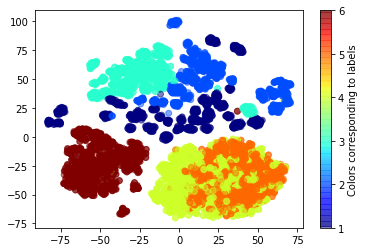

In [0]:
y_kmeansfig = plt.figure()
scat = plt.scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], c = y_train.values.flatten(), cmap = 'jet', alpha = 0.5)
cb = plt.colorbar(scat, ticks=range(1,7))
cb.set_label('Colors corresponding to labels')
plt.show()
plt.show()

We can also visualise the data in 3D:

In [0]:
X_tsne_3d = TSNE(n_components=3, perplexity=30, learning_rate=200.0).fit_transform(X_train.values)
print(X_tsne_3d.shape)

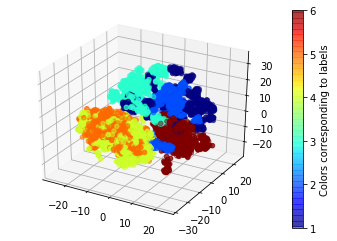

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
scat = ax.scatter3D(X_tsne_3d[:,0], X_tsne_3d[:,1], X_tsne_3d[:,2], c = y_train.values.flatten(), cmap = 'jet', alpha = 0.5)
cb = plt.colorbar(scat, ticks=range(1,7))
cb.set_label('Colors corresponding to labels')
plt.show()

As we can see, activity 6 can be very well clustered and separated from others.

But other activities can be difficult to seperate:
- Activity 1, 2 and 3 are difficult to seperate
- Activity 4 and 5 are difficult to seperate


### Step 2: Clustering
#### K-Means
Let's try a 6 cluster K-Means Clustering:

KMeans Clustering [896, 353, 1397, 1546, 1289, 1871]


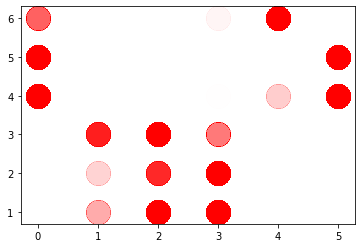

In [0]:
# Try a 6 clusters K-Means Clustering
cluster=6

y_kmeans = KMeans(n_clusters=cluster, random_state=0).fit(X_train.values)
print('KMeans Clustering', [np.sum(y_kmeans.labels_ == j) for j in range(cluster)])

# Plot the graph with a mapping of the labels for each cluster, the color transparency reveals the quantity 
fig = plt.figure()
plt.scatter(y_kmeans.labels_, y_train.values, c='r', alpha=0.002, s=600)
my_x_ticks = np.arange(0, 6, 1)
my_y_ticks = np.arange(0, 6, 1)
plt.show()

In this plot, the x axis correspond to the cluster index, while the y axis correspond to the true label of the data inside each cluster.
If the red color is darker, it means there is more data. Otherwise, there is less data.


We can see that the clusters are quite vaste and a lot of labels are mixed inside each cluster. we need more clusters to distinguish the different features.

Let's try a 12 cluters K-Means Clustering:

KMeans Clustering [1230, 822, 682, 632, 461, 248, 705, 191, 565, 250, 919, 647]


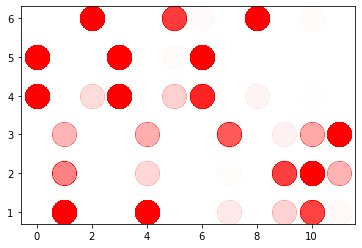

In [0]:
#Try a 12 clusters K-Means Clustering
cluster=12

y_kmeans = KMeans(n_clusters=cluster, random_state=0).fit(X_train.values)
print('KMeans Clustering', [np.sum(y_kmeans.labels_ == j) for j in range(cluster)])

# Plot the graph with a mapping of the labels for each cluster, the color transparency reveals the quantity 
fig = plt.figure()
plt.scatter(y_kmeans.labels_, y_train.values, c='r', alpha=0.002, s=600)
my_x_ticks = np.arange(0, 12, 1)
my_y_ticks = np.arange(0, 6, 1)
plt.show()

#### AHC
Let's try AHC clustering method with 12 clusters.
We use 4 different linkages of AHC clustering:
- ward linkage
- complete linkage
- average linkage
- single linkage

Agglomerative Clustering, linkage ward  [1255, 1195, 218, 667, 1460, 816, 181, 305, 54, 414, 672, 115]


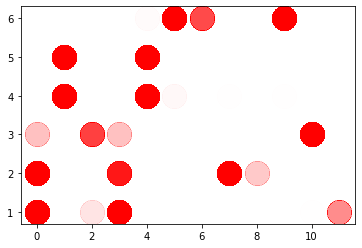

Agglomerative Clustering, linkage complete  [109, 492, 3989, 54, 60, 1023, 16, 2, 10, 7, 17, 1573]


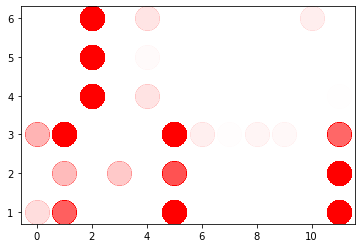

Agglomerative Clustering, linkage average  [46, 37, 23, 3, 4, 3153, 4023, 1, 5, 2, 54, 1]


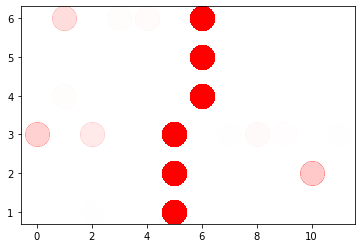

Agglomerative Clustering, linkage single  [7323, 14, 3, 2, 2, 1, 2, 1, 1, 1, 1, 1]


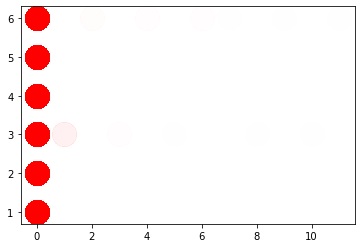

In [0]:
#Try a 12 clusters Agglomerative Clustering with different parameters
param_linkage = ['ward', 'complete', 'average', 'single']
cluster=12

# Plot the graph with a mapping of the labels for each cluster, the color transparency reveals the quantity 
fig = plt.figure()
for i in range(4):
    y_ahc = AgglomerativeClustering(n_clusters=cluster, linkage = param_linkage[i]).fit(X_train.values)
    print('Agglomerative Clustering, linkage %s ' % param_linkage[i], [np.sum(y_ahc.labels_ == j) for j in range(cluster)])
    plt.scatter(y_ahc.labels_, y_train.values, c='r', alpha=0.002, s=600)
    my_x_ticks = np.arange(0, 12, 1)
    my_y_ticks = np.arange(0, 6, 1)
    plt.show()

Compare these results, we can conclude that the AHC clustering with ward linkage has the best result. The results of other linkages are not quite seperable.

#### GMM
Then let's use GMM to generate 12 clusters.

GMM Clustering [511, 1059, 640, 906, 276, 763, 285, 350, 693, 1369, 364, 136]


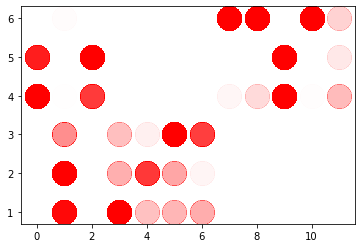

In [7]:
#Try the Gaussian Mixture Clustering
cluster=12

gmm = GaussianMixture(n_components=cluster).fit(X_train.values)
y_gmm = gmm.predict(X_train.values)
print('GMM Clustering', [np.sum(y_gmm == j) for j in range(cluster)])

# Plot the graph with a mapping of the labels for each cluster, the color transparency reveals the quantity 
fig = plt.figure()
plt.scatter(y_gmm, y_train.values, c='r', alpha=0.002, s=600)
my_x_ticks = np.arange(0, 12, 1)
my_y_ticks = np.arange(0, 6, 1)
plt.show()

We can see on the mapping graph that for each cluster, there are often more than one label mapped to it but one label would be more pronouced. So the result of cluster can correspond to the classifier in certain level. 

To compare the accuracy, we map the cluster to the most pronouced class label:

In [8]:
#From the scatter plot we map the clusters to the most pronouced class and make a dictionary from GMM clustering
correspondance_dict = dict()
for i in range (cluster):
  y_train_mask = y_train.values.reshape(len(y_train))[y_gmm == i]
  correspond_label = max(y_train_mask,key=list(y_train_mask).count)
  correspondance_dict.update( {i : correspond_label} )

print(correspondance_dict)

{0: 4, 1: 2, 2: 5, 3: 1, 4: 2, 5: 3, 6: 3, 7: 6, 8: 6, 9: 4, 10: 6, 11: 4}


In [0]:
# Define a function to replace the cluster number to the class
def replace_with_dict(ar, dic):
    # Extract out keys and values
    k = np.array(list(dic.keys()))
    v = np.array(list(dic.values()))

    # Get argsort indices
    sidx = k.argsort()

    # Drop the magic bomb with searchsorted to get the corresponding
    # places for a in keys (using sorter since a is not necessarily sorted).
    # Then trace it back to original order with indexing into sidx
    # Finally index into values for desired output.
    return v[sidx[np.searchsorted(k,ar,sorter=sidx)]]

Show the percentage of each label after the mapping:

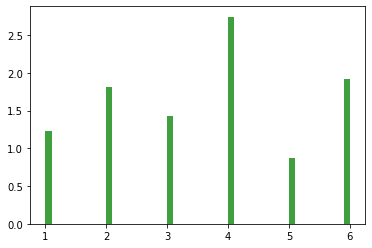

In [10]:
# Replace the cluster number with the mapped lables
y_gmm_replaced = replace_with_dict(y_gmm, correspondance_dict)

# Show the percentage of each label after the mapping
fig = plt.figure()
n, bins, patches = plt.hist(y_gmm_replaced, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

Print the classification report and confusion matrix after mapping the cluster to the most pronouced class label:

In [11]:
y_true, y_pred = y_train, y_gmm_replaced
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

              precision    recall  f1-score   support

           1       0.84      0.62      0.71      1226
           2       0.67      0.83      0.74      1073
           3       0.76      0.81      0.78       986
           4       0.52      0.81      0.63      1286
           5       0.69      0.32      0.44      1374
           6       0.97      0.97      0.97      1407

    accuracy                           0.72      7352
   macro avg       0.74      0.73      0.71      7352
weighted avg       0.74      0.72      0.71      7352


 CONFUSION MATRIX
[[ 762  309  155    0    0    0]
 [  80  894   99    0    0    0]
 [  64  128  794    0    0    0]
 [   0    1    0 1040  197   48]
 [   0    0    0  931  443    0]
 [   0    3    0   45    0 1359]]


The score is not too bad (around 70%)

We try to keep the same mapping dictionary to classify the test dataset to see if it is possible:

GMM Clustering [511, 1059, 640, 906, 276, 763, 285, 350, 693, 1369, 364, 136]


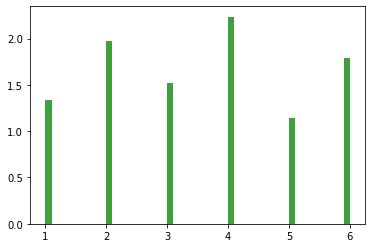

In [12]:
#Try the Gaussian Mixture Clustering

y_gmm_test = gmm.predict(X_test.values)
print('GMM Clustering', [np.sum(y_gmm == j) for j in range(cluster)])

# Replace the cluster number with the mapped lables
y_gmm_test_replaced = replace_with_dict(y_gmm_test, correspondance_dict)

# Show the percentage of each label after the mapping
fig = plt.figure()
n, bins, patches = plt.hist(y_gmm_test_replaced, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

In [13]:
y_true, y_pred = y_test, y_gmm_test_replaced
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

              precision    recall  f1-score   support

           1       0.86      0.69      0.76       496
           2       0.70      0.86      0.77       471
           3       0.72      0.77      0.75       420
           4       0.55      0.74      0.63       491
           5       0.65      0.41      0.51       532
           6       1.00      0.98      0.99       537

    accuracy                           0.74      2947
   macro avg       0.75      0.74      0.73      2947
weighted avg       0.75      0.74      0.74      2947


 CONFUSION MATRIX
[[340  77  79   0   0   0]
 [ 21 405  45   0   0   0]
 [ 33  62 325   0   0   0]
 [  0  14   0 361 116   0]
 [  0  14   0 298 220   0]
 [  0   9   0   0   0 528]]


The score is similar to the training dataset. So it is possible to use the clustering method to classify.

Conclusion: After the analyse of the training dataset, we can see that if we use the Clustering method to divide the samples and then label them, we can have a average score around 70%. It is possible to use this method.

Next step, we need to see with supervised classification method, how the accuracy changes.

### Step 3: Classification

We use firstly the Random Forest classifier to classify each training sample and test them on the test dataset

In [0]:
# Create and train a Random Forest classifier

param_grid = [
  {'n_estimators': [10, 30, 50, 70, 90], 
   'max_depth':[4, 5, 6, 7],
   'max_features': [3, 4, 5]}
 ]

# Cross-validation grid-search (for finding best possible accuracy)
clf = GridSearchCV( RandomForestClassifier(criterion='gini',
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features='auto', 
                             max_leaf_nodes=None, min_impurity_decrease=1e-07, bootstrap=True, 
                             oob_score=False, n_jobs=1, random_state=None, 
                             verbose=0, warm_start=False, class_weight=None),
                   param_grid, cv=5, scoring='accuracy') 
                 
clf = clf.fit(X_train.values, y_train.values)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()


# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test.values, y_test.values)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test.values)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

Best parameters set found on development set:

{'max_depth': 7, 'max_features': 5, 'n_estimators': 50}

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=1e-07,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=1,
                                              oob_score=False,
                                              random_s

Let's try the MLP Classifier:

In [0]:
# Create and train a MLP classifier

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001]}
 ]
print(param_grid)

# Cross-validation grid-search (for finding best possible accuracy)
clf = GridSearchCV( MLPClassifier(activation='tanh', batch_size=4, beta_1=0.9,
                                  beta_2=0.999, early_stopping=True, epsilon=1e-08,
                                  learning_rate='constant',
                                  max_iter=200, momentum=0.8,
                                  nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
                                  solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
                                  warm_start=False), 
                   param_grid, cv=5, scoring='accuracy') 
    
clf.fit(X_train.values, y_train.values)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test.values)
print(classification_report(y_true, y_pred))
print()

[{'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 'learning_rate_init': [0.003, 0.01, 0.03, 0.1], 'alpha': [1e-05, 0.0001, 0.001]}]
Best parameters set found on development set:

{'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.003}

Grid scores on development set:

0.844 (+/-0.106) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.003}
0.839 (+/-0.084) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01}
0.471 (+/-0.186) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.03}
0.353 (+/-0.137) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.1}
0.929 (+/-0.059) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.003}
0.851 (+/-0.118) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
0.473 (+/-0.069) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.03}
0.386 (+/-0.065) for {'alpha': 1e-05, 'hidden_l

The results shows that we have at least 20% more accuracy than the clustering method even for the test dataset. 

To compare, it is possible to use the clustering method to classify but the score is lower than the classical classification method.

So the best way is to use the supervised classification method such as Random Forest or MLP. The MLP method provide a better result but it takes much more time to train (30 mins to 1h) than RF (less than 1 min).